In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

## Read in data

In [2]:
behav_data_7t = pd.read_csv('../data/unres_behav_data.csv', dtype={'Subject': 'str'})
behav_data_7t.set_index("Subject", inplace=True)
print(behav_data_7t.shape)
behav_data_7t.head()

(184, 382)


,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100610,S900,Q08,M,26-30,True,2,1,4,100.0,True,...,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
102311,S500,Q06,F,26-30,True,1,1,4,100.0,True,...,4.4,122.25,110.45,1,52.2,98.31,99.06,1.80,0,1.80
102816,Q3,Q03,F,26-30,True,1,1,4,100.0,True,...,5.2,122.25,111.41,1,52.6,98.31,97.68,1.72,1,1.68
104416,S900,Q09,F,31-35,True,2,2,4,100.0,True,...,2.8,101.12,87.11,0,38.6,95.36,93.48,1.92,1,1.88
105923,MEG2,Q07,F,31-35,True,2,2,4,100.0,True,...,5.2,122.25,111.41,0,38.6,97.26,96.41,1.88,1,1.84


In [3]:
behav_data_1200 = pd.read_csv('../data/unrestricted_behav_1200subs.csv', dtype={'Subject': 'str'})
behav_data_1200.set_index("Subject", inplace=True)
print(behav_data_1200.shape)
behav_data_1200.head()

(1206, 581)


,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100004,S900,Q06,M,22-25,False,0,0,0,0.0,False,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
100206,S900,Q11,M,26-30,True,1,1,4,100.0,True,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
100307,Q1,Q01,F,26-30,True,1,1,4,100.0,True,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,Q3,Q03,M,31-35,True,1,1,4,100.0,True,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
100610,S900,Q08,M,26-30,True,2,1,4,100.0,True,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


# Get subj IDs for 7T subs and remove them from 1200 dataframe

In [4]:
subs_7t = behav_data_7t.index.values
subs_7t

array(['100610', '102311', '102816', '104416', '105923', '108323',
       '109123', '111312', '111514', '114823', '115017', '115825',
       '116726', '118225', '125525', '126426', '126931', '128935',
       '130114', '130518', '131217', '131722', '132118', '134627',
       '134829', '135124', '137128', '140117', '144226', '145834',
       '146129', '146432', '146735', '146937', '148133', '150423',
       '155938', '156334', '157336', '158035', '158136', '159239',
       '162935', '164131', '164636', '165436', '167036', '167440',
       '169040', '169343', '169444', '169747', '171633', '172130',
       '173334', '175237', '176542', '177140', '177645', '177746',
       '178142', '178243', '178647', '180533', '181232', '181636',
       '182436', '182739', '185442', '186949', '187345', '191033',
       '191336', '191841', '192439', '192641', '193845', '195041',
       '196144', '197348', '198653', '199655', '200210', '200311',
       '200614', '201515', '203418', '204521', '205220', '2092

In [5]:
behav_data_train = behav_data_1200.drop(subs_7t)
assert behav_data_train.shape[0] == behav_data_1200.shape[0]-len(subs_7t)
behav_data_train.shape

(1022, 581)

In [18]:
def explained_variance(X, model):
    result = np.zeros(model.n_components_)
    for ii in range(model.n_components_):
        X_trans = model.transform(X)
        X_trans_ii = np.zeros_like(X_trans)
        X_trans_ii[:, ii] = X_trans[:, ii]
        X_approx_ii = model.inverse_transform(X_trans_ii)

        result[ii] = 1 - (np.linalg.norm(X_approx_ii - X) /
                          np.linalg.norm(X - model.mean_)) ** 2
    return result

def do_pca(train_data, test_data, col_list, flip_sign=False, save_csv=False, domain_name = ''):
    # Get only those columns corresponding to input list
    train_data = train_data.loc[:,col_list].dropna()

    # Scale each column to have mean = 0, variance = 1
    scaler = StandardScaler()
    train_data_std = scaler.fit_transform(train_data)

    # Run PCA on standardized data
    model = PCA(None)
    train_pcs = model.fit_transform(train_data_std)
    
    if flip_sign:
        model.components_ = model.components_*-1

    
    # Apply PCA to test data
    test_data = test_data.loc[:,col_list]
    test_data = test_data.fillna(test_data.mean()) # fill missing values with mean
    test_data_std = scaler.transform(test_data)
    test_pc_scores = model.transform(test_data_std)
    
    test_explained_variance = explained_variance(test_data_std, model)

    # Visualize elbow plot for explained variance
    fig = plt.figure(figsize=[10,6])
    ax = fig.add_subplot(1,2,1) 
    ax.set_xlabel('Principal Component') #, fontsize = 15)
    ax.set_ylabel('Variance explained (%)') #, fontsize = 15)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax.set_title('N-component PCA') #, fontsize = 20)
    plt.plot(model.explained_variance_ratio_, marker='o', color='gray', linestyle='dashed', label='Train set')
    plt.plot(test_explained_variance, marker='o', color='black', label='Target set')
    
    # Add markers at first component
    # plt.scatter(0, pca.explained_variance_ratio_[0], color='gray', s=50)
    # plt.scatter(0, test_explained_variance[0], color='black', s=50)
    # Add red circles around them
    plt.plot(0, model.explained_variance_ratio_[0], marker='o', fillstyle='none', color='red', markersize=20)
    plt.plot(0, test_explained_variance[0], marker='o', fillstyle='none', color='red', markersize=20)

    plt.legend()
    # for i, txt in enumerate(pca.explained_variance_ratio_[0:4]):
    #    ax.annotate(round(txt,2), (i,pca.explained_variance_ratio_[i]), fontsize=14)
    
    # Get feature loadings for the first component
    coeffs = pd.DataFrame(model.components_[0:1,:], columns=col_list,index = ['PC-1'])

    # Visualize feature coefficients
    coeffs = coeffs.transpose()
    labels = coeffs.sort_values(by=['PC-1'], ascending=False).index.values.reshape(-1,1)
    data = coeffs.sort_values(by=['PC-1'], ascending=False)

    ax = fig.add_subplot(1,2,2) 
    ax = sns.heatmap(data, 
                     # annot=True, fmt=".2f", 
                     annot=np.atleast_2d(labels), fmt='s',
                     center=0, cmap="RdBu_r", cbar_kws={'label': 'PC1 Loading'})
    cbar = ax.collections[0].colorbar
    cbar.set_label('PC1 Loading', labelpad=15)
    
    # ax.set_title("Variable Loadings")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plt.tight_layout()
    # plt.show()
    
    if save_csv:
        columns = []
        for c in range(test_pc_scores.shape[1]):
            columns.append(domain_name + '_PC' + str(c+1))
        print(columns)
        pd.DataFrame(data=test_pc_scores, index=test_data.index, columns=columns).to_csv('../data/'+ domain_name + '_pc_scores.csv')
    
    return model, test_pc_scores, test_explained_variance

## Define lists of measures

In [7]:
plt.rcParams.update({'font.size': 18})

In [8]:
cognToolboxMeasures = list([
    'PicSeq_Unadj','CardSort_Unadj','Flanker_Unadj','PMAT24_A_CR',
    'ReadEng_Unadj','PicVocab_Unadj','ProcSpeed_Unadj','VSPLOT_TC',
    'SCPT_SEN','SCPT_SPEC','IWRD_TOT','ListSort_Unadj'
                           ])

In [9]:
emotToolboxMeasures = list(['AngAffect_Unadj', 'AngHostil_Unadj', 'AngAggr_Unadj', 'FearAffect_Unadj',
    'FearSomat_Unadj', 'Sadness_Unadj', 'LifeSatisf_Unadj', 'MeanPurp_Unadj', 'PosAffect_Unadj',
    'Friendship_Unadj', 'Loneliness_Unadj', 'PercHostil_Unadj', 'PercReject_Unadj', 'EmotSupp_Unadj',
    'InstruSupp_Unadj', 'PercStress_Unadj', 'SelfEff_Unadj'])

['cogn_PC1', 'cogn_PC2', 'cogn_PC3', 'cogn_PC4', 'cogn_PC5', 'cogn_PC6', 'cogn_PC7', 'cogn_PC8', 'cogn_PC9', 'cogn_PC10', 'cogn_PC11', 'cogn_PC12']


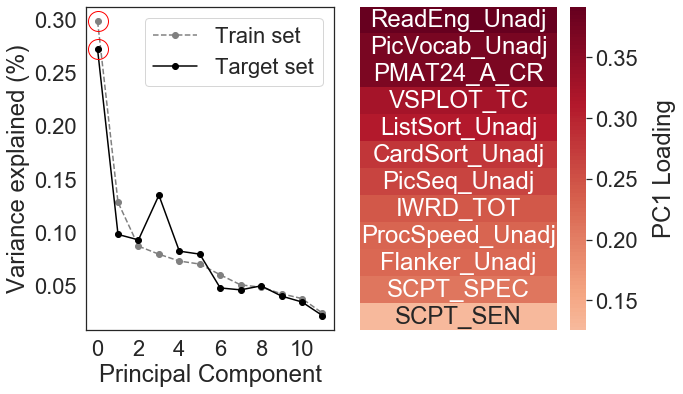

In [19]:
model, cogn_pc_scores, test_explained_variance = do_pca(behav_data_train, behav_data_7t, cognToolboxMeasures, flip_sign=True, save_csv=True, domain_name='cogn')
# plt.savefig('figures/cogn_pca.png', dpi=300)

In [11]:
model.explained_variance_ratio_

array([0.29775524, 0.12813175, 0.087049  , 0.07952006, 0.07308042,
       0.0702669 , 0.06020532, 0.05073967, 0.04862667, 0.04242353,
       0.03791855, 0.02428288])

In [12]:
test_explained_variance

array([0.27154161, 0.09804376, 0.09292872, 0.13478558, 0.08236007,
       0.07957865, 0.0478823 , 0.0460904 , 0.04984443, 0.04025742,
       0.03471402, 0.02197303])

['emot_PC1', 'emot_PC2', 'emot_PC3', 'emot_PC4', 'emot_PC5', 'emot_PC6', 'emot_PC7', 'emot_PC8', 'emot_PC9', 'emot_PC10', 'emot_PC11', 'emot_PC12', 'emot_PC13', 'emot_PC14', 'emot_PC15', 'emot_PC16', 'emot_PC17']


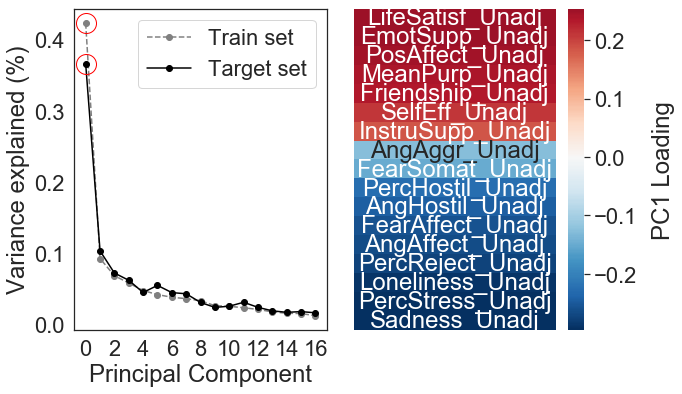

In [20]:
model, emot_pc_scores, test_explained_variance = do_pca(behav_data_train, behav_data_7t, emotToolboxMeasures, flip_sign=True, save_csv=True, domain_name='emot')
# plt.savefig('figures/emot_pca.jpg', dpi=300)

In [14]:
model.explained_variance_ratio_

array([0.42327999, 0.09272332, 0.06866561, 0.05834172, 0.04777586,
       0.04212968, 0.03835867, 0.0363882 , 0.03352399, 0.0265313 ,
       0.0257053 , 0.02358729, 0.02133566, 0.01777708, 0.01593287,
       0.01544916, 0.0124943 ])

In [15]:
test_explained_variance

array([0.36609508, 0.10340732, 0.07242089, 0.06219894, 0.04506011,
       0.05502483, 0.04489893, 0.04324509, 0.0310388 , 0.02411033,
       0.02578453, 0.03128237, 0.02420056, 0.01930621, 0.01720372,
       0.01821089, 0.0165114 ])

(0.1121254246162529, 0.129681035974963)


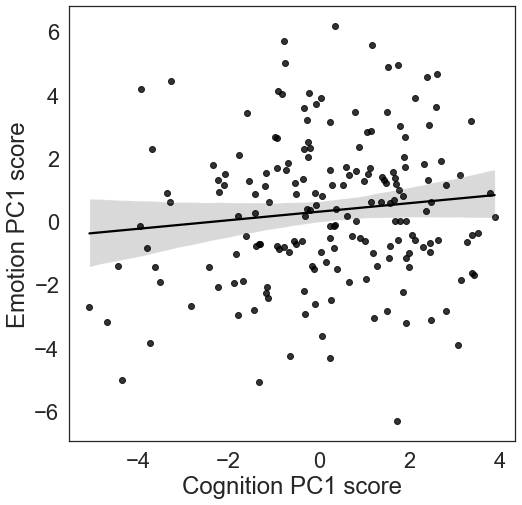

In [17]:
x = cogn_pc_scores[:,0]
y = emot_pc_scores[:,0]

fig, ax = plt.subplots(figsize=(8,8))

sns.regplot(x,y, ax=ax, color='black')
ax.set_xlabel('Cognition PC1 score')
ax.set_ylabel('Emotion PC1 score')
# ax.set_aspect('equal', 'box')
sns.set(font_scale=2, style='white')
print(sp.stats.pearsonr(x,y))

# plt.savefig('figures/cogn_emot_pc1_correlation.jpg', dpi=300)